In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Attention
## Kolmogorov-Arnold Networks (KAN)

This is KAN usage on Heart Disase dataset

You can find mote informaiton in tihs notebook => https://www.kaggle.com/code/seyidcemkarakas/kan-tabular-data-binary-classification

In [29]:
pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-quuz53mj
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-quuz53mj
  Resolved https://github.com/KindXiaoming/pykan.git to commit 173dadda8274897d97a7a63518c64caccda65576
  Preparing metadata (setup.py) ... done


In [30]:
import torch
from kan import KAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("/content/heart.csv")

In [32]:
X = df[list(df.columns.drop("target"))[0:11]]
y = df["target"]

In [33]:
# Splitting data to train val test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

# Converting data to Torch tensor
train_input = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy(), dtype=torch.long)
val_input = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
val_label = torch.tensor(y_val.to_numpy(), dtype=torch.long)
test_input = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [34]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'val_input': val_input,
    'val_label': val_label,
    'test_input': test_input,
    'test_label': test_label
}

In [35]:
# Create model
model = KAN(width=[11, 2], grid=10, k=3)

checkpoint directory created: ./model
saving model version 0.0


In [36]:
# Fuctions for getting accuracy scores while training
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())

def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())

In [37]:
# Create model
model = KAN(width=[11, 2], grid=10, k=3) #epochs is not a parameter for the KAN constructor

# Fuctions for getting accuracy scores while training
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())

def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())

# KAN model training
# Assuming your KAN class has a fit method for training
import torch
results = model.fit({'train_input': train_input, 'train_label': train_label,
                       'test_input': val_input, 'test_label': val_label},
                      loss_fn=torch.nn.CrossEntropyLoss()) # epochs is not a parameter of the fit method

# Calculate accuracy scores separately after training if needed
train_accuracy = train_acc()
test_accuracy = test_acc()

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.79e+00 | test_loss: 1.85e+00 | reg: 1.22e+04 | : 100%|█| 100/100 [00:20<00:00,  4.98


saving model version 0.1
Train Accuracy: 0.7547169923782349
Test Accuracy: 0.782608687877655


In [38]:
# Predictions of train val and test datasets
test_preds = torch.argmax(model.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model.forward(train_input).detach(),dim=1)
train_labels = train_label

val_preds = torch.argmax(model.forward(val_input).detach(),dim=1)
val_labels = val_label


# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Val ACC:", accuracy_score(val_labels.numpy(), val_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

Train ACC: 0.7547169811320755
Val ACC: 0.7777777777777778
Test ACC: 0.782608695652174


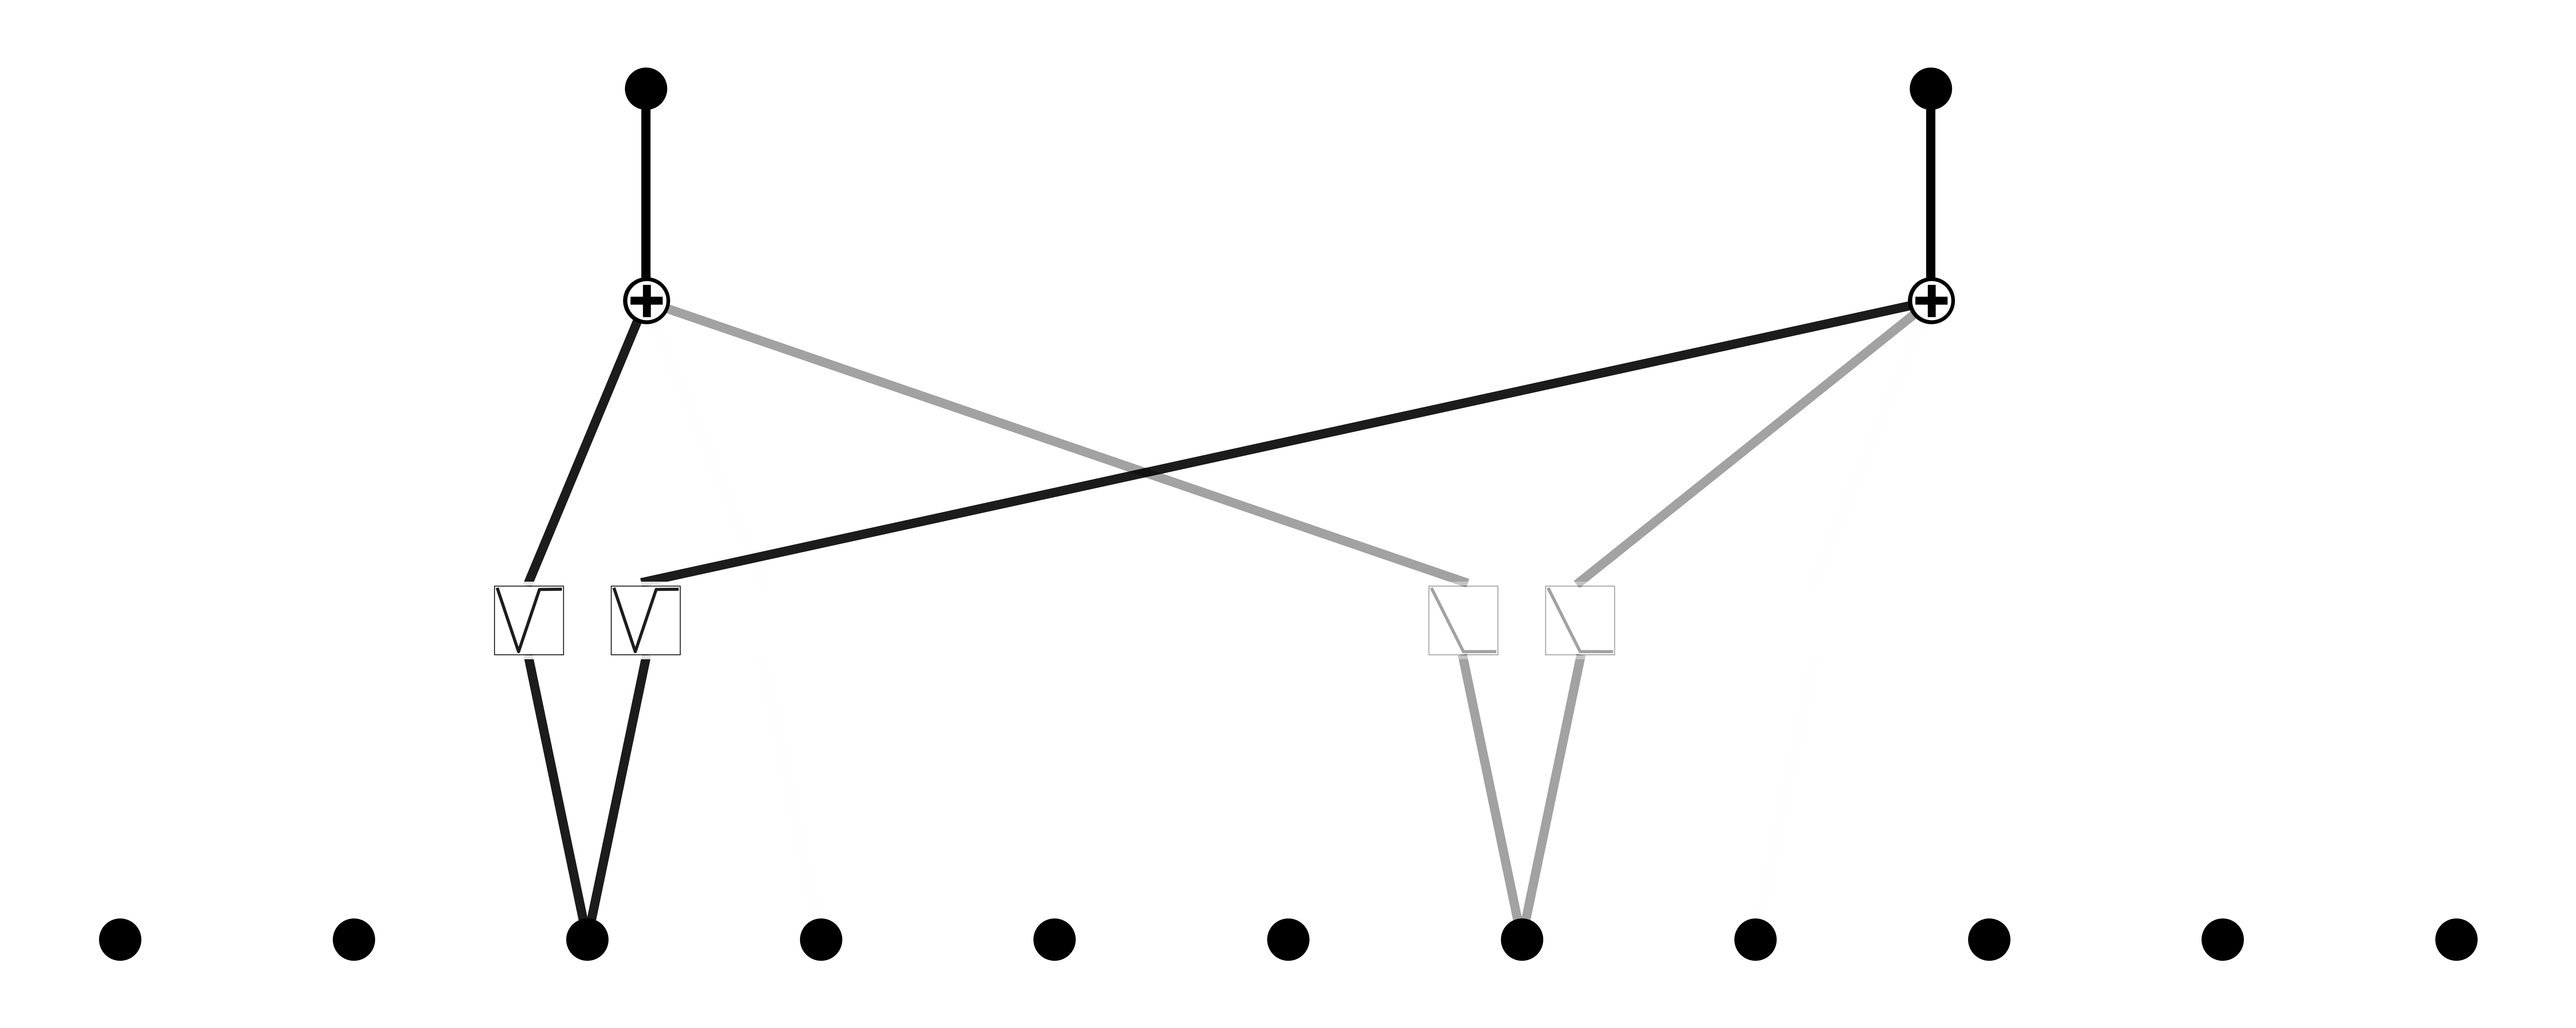

In [39]:
# Plotting KAN network
model.plot(scale=10)

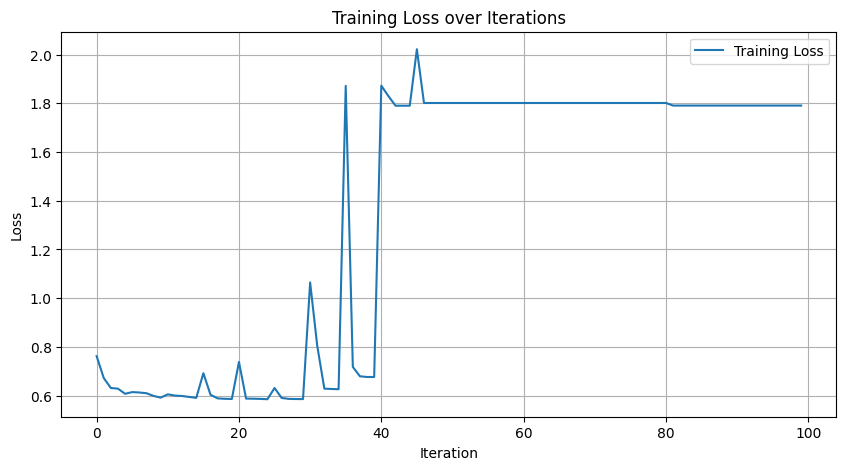

In [40]:
# Learning curve based on ACC and LOSS
plt.figure(figsize=(10, 5))
plt.plot(results["train_loss"], label='Training Loss') # Plot available data
plt.title('Training Loss over Iterations') # Adjust title to reflect available data
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()